# EigenFaces - Face Classification in Python

## Imports and Dataset Exploration

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('face_data.csv')
df.head()

,0,1,2,3,4,5,6,7,8,9,...,4087,4088,4089,4090,4091,4092,4093,4094,4095,target
0,0.309917,0.367769,0.417355,0.442149,0.528926,0.607438,0.657025,0.677686,0.690083,0.685950,...,0.669422,0.652893,0.661157,0.475207,0.132231,0.148760,0.152893,0.161157,0.157025,0
1,0.454545,0.471074,0.512397,0.557851,0.595041,0.640496,0.681818,0.702479,0.710744,0.702479,...,0.157025,0.136364,0.148760,0.152893,0.152893,0.152893,0.152893,0.152893,0.152893,0
2,0.318182,0.400826,0.491736,0.528926,0.586777,0.657025,0.681818,0.685950,0.702479,0.698347,...,0.132231,0.181818,0.136364,0.128099,0.148760,0.144628,0.140496,0.148760,0.152893,0
3,0.198347,0.194215,0.194215,0.194215,0.190083,0.190083,0.243802,0.404959,0.483471,0.516529,...,0.636364,0.657025,0.685950,0.727273,0.743802,0.764463,0.752066,0.752066,0.739669,0
4,0.500000,0.545455,0.582645,0.623967,0.648760,0.690083,0.694215,0.714876,0.723140,0.731405,...,0.161157,0.177686,0.173554,0.177686,0.177686,0.177686,0.177686,0.173554,0.173554,0


In [3]:
df.shape

(400, 4097)

In [4]:
df['target'].nunique()

40

In [5]:
64 * 64

4096

<br><br>

## Image Visualization

In [6]:
def plot_faces(pixels):
    fig, axes = plt.subplots(5, 5, figsize=(6, 6))
    for i, ax in enumerate(axes.flat):
        ax.imshow(np.array(pixels)[i].reshape(64, 64), cmap='gray')
    plt.show()

In [7]:
X = df.drop('target', axis=1)
y = df['target']

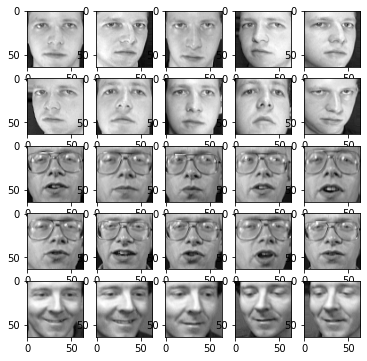

In [8]:
plot_faces(X)

<br><br>


## Principal Component Analysis

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

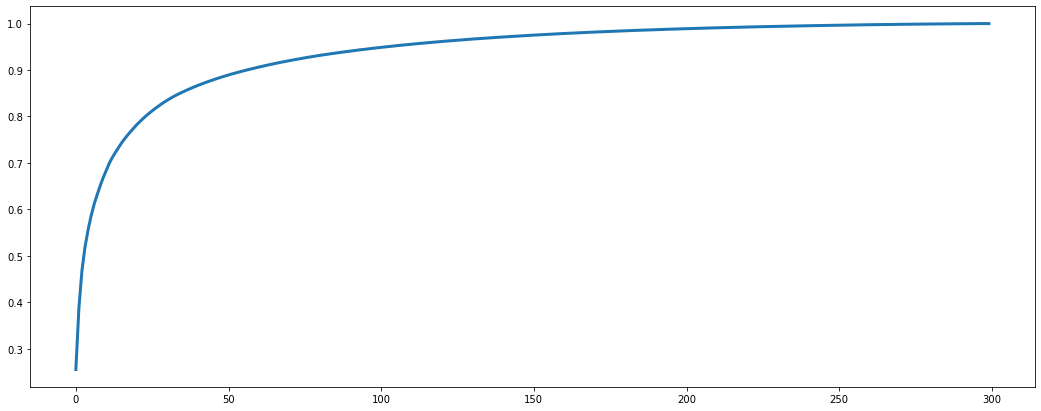

In [10]:
pca = PCA().fit(X_train)

plt.figure(figsize=(18, 7))
plt.plot(pca.explained_variance_ratio_.cumsum(), lw=3)

In [11]:
np.where(pca.explained_variance_ratio_.cumsum() > 0.95)

(array([102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114,
        115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127,
        128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140,
        141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153,
        154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166,
        167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179,
        180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192,
        193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205,
        206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218,
        219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231,
        232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244,
        245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257,
        258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270,
        271, 272, 273, 274, 275, 276, 277, 278, 279

In [12]:
pca = PCA(n_components=105).fit(X_train)

In [13]:
X_train_pca = pca.transform(X_train)

<br><br>

## Model Training & Evaluation

In [14]:
classifier = SVC().fit(X_train_pca, y_train)

In [15]:
X_test_pca = pca.transform(X_test)
predictions = classifier.predict(X_test_pca)

In [16]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.67      0.67      0.67         3
           1       1.00      1.00      1.00         1
           2       0.00      0.00      0.00         0
           3       0.67      0.67      0.67         3
           4       1.00      0.80      0.89         5
           5       1.00      1.00      1.00         2
           6       1.00      0.75      0.86         4
           8       1.00      1.00      1.00         2
           9       1.00      0.67      0.80         6
          10       1.00      1.00      1.00         1
          12       0.67      0.50      0.57         4
          13       1.00      1.00      1.00         2
          14       0.50      1.00      0.67         2
          15       1.00      0.75      0.86         4
          16       0.80      1.00      0.89         4
          17       1.00      1.00      1.00         1
          18       1.00      1.00      1.00         1
          19       1.00    